In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

In [2]:
#Load Database
conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=ACFC-L-DANGNIKE\SQLEXPRESS;'
    'Database=NIKE;'
    'Trusted_Connection=yes;')

In [3]:
#load sales data
sale = pd.read_sql_query(
    """DECLARE @ld date
    SET @ld =  (select max(created_date) from SALES_DATA)
    select 
        STORE_CODE, CREATED_DATE, INVC_NO, CUST_ID, SALES_DATA.UPC, --thông tin về hóa đơn
        QTY, ORIG_AMT_TOTAL, EXT_AMT_TOTAL, DISC_PERC, DISC_REASON_NAME, PROMO_NAME,
        ORIG_AMT_TOTAL/QTY ORG_PRC, EXT_AMT_TOTAL/QTY EXT_PRC
    from 
        SALES_DATA
    where 
        CREATED_DATE between DATEADD(year,-1,@ld) AND @ld  AND --Lấy data sale trong vòng 1 năm trở lại đây
        QTY>0 --Lọc bỏ những sản phẩm đổi hàng""",
    conn)
sale.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,STORE_CODE,CREATED_DATE,INVC_NO,CUST_ID,UPC,QTY,ORIG_AMT_TOTAL,EXT_AMT_TOTAL,DISC_PERC,DISC_REASON_NAME,PROMO_NAME,ORG_PRC,EXT_PRC
0,304,2022-02-20,6526,111111111,195243246916,1.0,950000.0,950000.0,0.0,,,950000.0,950000.0
1,344,2022-02-17,14181,111111111,195866010581,1.0,1090000.0,1090000.0,0.0,,,1090000.0,1090000.0
2,332,2022-02-20,12983,111111111,195244652440,1.0,850000.0,850000.0,0.0,,,850000.0,850000.0
3,668,2022-02-14,92992,111111111,195243252955,1.0,1050000.0,1050000.0,0.0,Free G,,1050000.0,1050000.0
4,330,2022-02-20,7892,111111111,195242780060,1.0,950000.0,950000.0,0.0,,,950000.0,950000.0


In [4]:
#load product Master file
mf = pd.read_sql_query(
    """SELECT MASTER_FILE.SKU, SIZE, UPC, DIV, GENDER, CAT, AGE, SILHOUETE, FRANCHISE, COLLECTION, DES, SRP
    FROM MASTER_FILE, MASTER_UPC
    WHERE MASTER_FILE.SKU=MASTER_UPC.SKU AND VEND='NIKE'""",
    conn)
mf.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,SKU,SIZE,UPC,DIV,GENDER,CAT,AGE,SILHOUETE,FRANCHISE,COLLECTION,DES,SRP
0,130690-007,7.5,886916604262,FW,MALE,JOR,ADULT,THREE QUARTER HIGH,AIR JORDAN 12,NO COLLECTION,AIR JORDAN 12 RETRO,5857000.0
1,130690-007,8,886916604279,FW,MALE,JOR,ADULT,THREE QUARTER HIGH,AIR JORDAN 12,NO COLLECTION,AIR JORDAN 12 RETRO,5857000.0
2,130690-007,8.5,886916606891,FW,MALE,JOR,ADULT,THREE QUARTER HIGH,AIR JORDAN 12,NO COLLECTION,AIR JORDAN 12 RETRO,5857000.0
3,130690-007,9,886916606907,FW,MALE,JOR,ADULT,THREE QUARTER HIGH,AIR JORDAN 12,NO COLLECTION,AIR JORDAN 12 RETRO,5857000.0
4,130690-007,9.5,886916606914,FW,MALE,JOR,ADULT,THREE QUARTER HIGH,AIR JORDAN 12,NO COLLECTION,AIR JORDAN 12 RETRO,5857000.0


In [5]:
#load store Master file
store = pd.read_sql_query(
    """select * from MASTER_STORE
    WHERE TIER IN ('NSP','DS','OUTLET')""",
    conn)
store.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,STORE CODE,TIER,CHANNEL,LEVEL,LEVEL 2,STORE_NAME,SHORT NAME,AREA,CITY
0,301,NSP,INLINE,NSP BTR,None,NIKE ZEN,None,None,None
1,303,DS,INLINE,DS,SG BETTER,NIKE PARKSON ĐỒNG KHỞI,PSDK,SOUTH,HCM
2,304,DS,INLINE,DS,SG BETTER,DIAMOND PLAZA,DMD,SOUTH,HCM
3,305,DS,INLINE,DS,SG BETTER,NIKE PARKSON VIETOWER,None,None,None
4,306,DS,INLINE,DS,SG BETTER,NIKE PARKSON HAI PHONG,None,None,None


In [6]:
sale['QTY'] = sale['QTY'].astype("int64")
sale['CREATED_DATE']=sale['CREATED_DATE'].astype('datetime64')
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575968 entries, 0 to 575967
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   STORE_CODE        575968 non-null  object        
 1   CREATED_DATE      575968 non-null  datetime64[ns]
 2   INVC_NO           575968 non-null  object        
 3   CUST_ID           443252 non-null  object        
 4   UPC               575968 non-null  object        
 5   QTY               575968 non-null  int64         
 6   ORIG_AMT_TOTAL    575968 non-null  float64       
 7   EXT_AMT_TOTAL     575968 non-null  float64       
 8   DISC_PERC         575968 non-null  float64       
 9   DISC_REASON_NAME  443252 non-null  object        
 10  PROMO_NAME        443252 non-null  object        
 11  ORG_PRC           575968 non-null  float64       
 12  EXT_PRC           575968 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memor

In [7]:
def sold_qty(x):
    return x.QTY.sum()

def trans(x):
    return (sale['CREATED_DATE'].dt.year.astype(str) + x["INVC_NO"]).nunique()

def amt(x):
    return x.EXT_AMT_TOTAL.sum()

def org(x):
    return x.ORIG_AMT_TOTAL.sum()

dt=sale[sale['STORE_CODE'].str[:1]=='3'].groupby('STORE_CODE',as_index=False).apply(lambda x:pd.Series({
    'SOLD_QTY':sold_qty(x),
    'TRANS':trans(x),
    'AMT':amt(x),
    'UPT':sold_qty(x)/trans(x),
    'AUP':amt(x)/sold_qty(x),
    'APT':amt(x)/trans(x),
    'DIS':1-amt(x)/org(x)}))
dt

,STORE_CODE,SOLD_QTY,TRANS,AMT,UPT,AUP,APT,DIS
0,304,6359.0,3526.0,8.413467e+09,1.803460,1.323080e+06,2.386122e+06,0.169986
1,309,4956.0,2484.0,6.440494e+09,1.995169,1.299535e+06,2.592791e+06,0.124999
2,311,24935.0,13679.0,4.452648e+10,1.822867,1.785702e+06,3.255097e+06,0.103575
3,314,8306.0,4976.0,1.393287e+10,1.669212,1.677447e+06,2.800015e+06,0.116034
4,315,1497.0,770.0,1.229106e+09,1.944156,8.210461e+05,1.596242e+06,0.163908
5,316,10654.0,5825.0,1.556975e+10,1.829013,1.461399e+06,2.672918e+06,0.182774
6,317,24008.0,12081.0,2.601791e+10,1.987253,1.083718e+06,2.153622e+06,0.430469
7,318,8335.0,5047.0,1.060066e+10,1.651476,1.271824e+06,2.100387e+06,0.194384
8,321,7736.0,3993.0,9.513497e+09,1.937390,1.229769e+06,2.382544e+06,0.197101
9,322,7219.0,4185.0,1.011846e+10,1.724970,1.401643e+06,2.417792e+06,0.164166


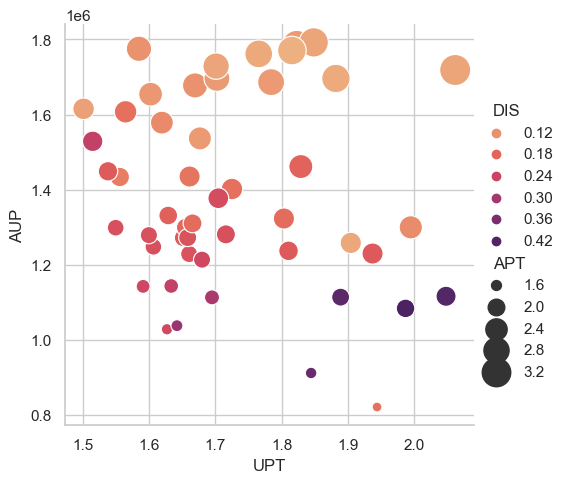

In [8]:
sns.set_theme(style="whitegrid")

#plt.figure(figsize=(18,30))

sns.color_palette("flare", as_cmap=True)

g = sns.relplot(
    data=dt,
    x="UPT", y="AUP",
    hue="DIS", size="APT",
    palette="flare", sizes=(50, 500),
)

#for i,txt in enumerate(dt['SHORT NAME']):
 #   plt.annotate(txt, (dt.UPT[i], dt.AUP[i]))

plt.show(g)